In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from dmba import regressionSummary
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score
import seaborn as sns

# PROBLEM 6.1 Predicting Boston Housing Prices

In [2]:
boston_df = pd.read_csv('BostonHousing.csv')

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


### 6.1 a , 
__Why should the data be partitioned into training and validation sets? What
will the training set be used for? What will the validation set be used for?__

When same data is used to develop a model and evaluate its performance, it ends up model being overfit on existing data, while it may not perform as accurate on "unseen" data. To overcome this issue, we divide the data into partitions namely  training data and validatiaon data. 
On training data, we build the models, the model cofficients are learned on this data. Validation data is used to assess the predictive performance of each model. It is necessary to have validation data, to have unbiased estimates of our model performance.


### 6.1 b, 
__Fit a multiple linear regression model to the median house price (MEDV) as a
function of CRIM, CHAS, and RM. Write the equation for predicting the
median house price from the predictors in the model.__


In [5]:
columns_to_use = ['CRIM', 'CHAS', 'RM']
target = 'MEDV'

df_x = boston_df[columns_to_use]
df_y = boston_df[target]

In [6]:
df_x.shape

(506, 3)

In [7]:
df_y.shape

(506,)

In [8]:
model= LinearRegression()
model.fit(df_x,df_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print("Cofficients of Linear model are: " ,model.coef_)
print("Intercept of Linear model is: " ,model.intercept_)
#eq:


Cofficients of Linear model are:  [-0.26072441  3.76303705  8.27817981]
Intercept of Linear model is:  -28.810682506359154


MEDV = (-0.2607 * CRIM ) + ( 3.763 * CHAS ) + ( 8.278 * RM ) -28.8

### 6.1 c,
__Using the estimated regression model, what median house price is predicted
for a tract in the Boston area that does not bound the Charles River, has a
crime rate of 0.1, and where the average number of rooms per house is 6?__

In [10]:
new_df = pd.DataFrame([[0.1, 0, 6]], columns=['CRIM', 'CHAS', 'RM'])

In [11]:
model.predict(new_df)

array([20.83232392])

In [12]:
print("Predicted median house price : ",model.predict(new_df) )

Predicted median house price :  [20.83232392]


### 6.1 d 
__ii. Compute the correlation table for the 12 numerical predictors and search
for highly correlated pairs. These have potential redundancy and can
cause multicollinearity. Choose which ones to remove based on this table.__

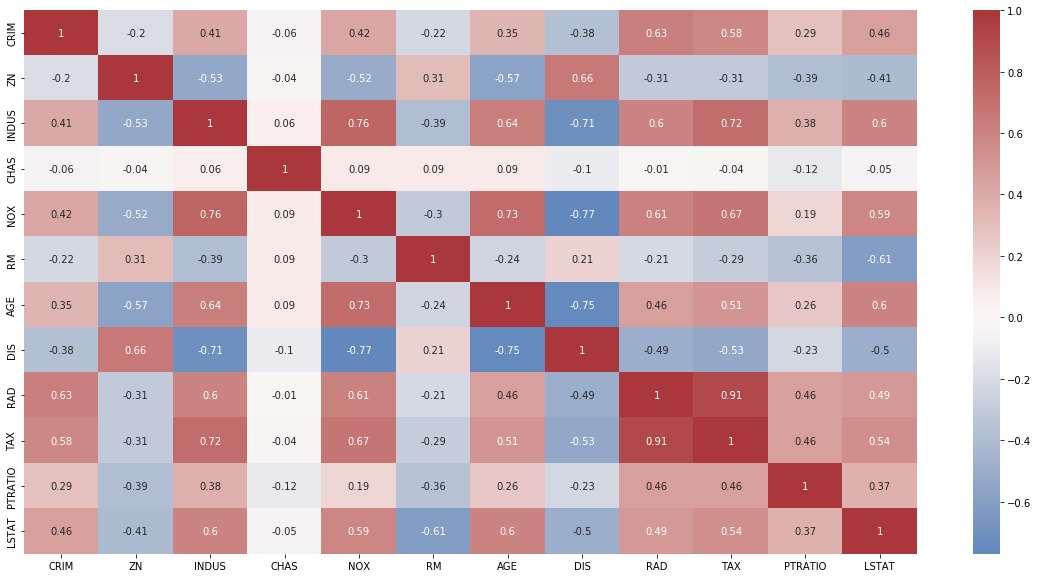

In [13]:
corr=boston_df.drop(['MEDV', 'CAT. MEDV'] , axis=1).corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr.round(2),center = 0,cmap = 'vlag',annot = True);

_Highly correleated pairs_

NOX and INDUS = 0.76

DIS and INDUS = -0.71

TAX and INDUS = 0.72

DIS and NOX = -0.77

DIS and AGE = -0.75

TAX and RAD = 0.91

AGE and NOX = 0.73

So we can remove NOX,  DIS and TAX. 




### 6.1 d 
__iii. Use three subset selection algorithms: backward, forward, and
stepwise) to reduce the remaining predictors. Compute the validation
performance for each of the three selected models. Compare RMSE,
MAPE, and mean error, as well as histograms of the errors. Finally,
describe the best model.__



In [14]:
train_X, valid_X, train_y, valid_y = train_test_split(boston_df.drop(['MEDV', 'CAT. MEDV'], axis= 1), boston_df['MEDV'], test_size=0.4, random_state=1)
print('Training set:', train_X.shape)
print('Training Target: ', train_y.shape)
print('Validation set: ', valid_X.shape)
print('Validation Target: ', valid_y.shape)

Training set: (303, 12)
Training Target:  (303,)
Validation set:  (203, 12)
Validation Target:  (203,)


In [15]:
model= LinearRegression()
model.fit(train_X,train_y)
print("RAW VALIDATION RESULTS")
regressionSummary(valid_y, model.predict(valid_X))

RAW VALIDATION RESULTS

Regression statistics

                      Mean Error (ME) : -0.0337
       Root Mean Squared Error (RMSE) : 5.0814
            Mean Absolute Error (MAE) : 3.5830
          Mean Percentage Error (MPE) : -5.1201
Mean Absolute Percentage Error (MAPE) : 16.9763


### BACKWARD ELIMINATION 

In [16]:
train_X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

In [17]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)
allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose=True)
print('best variables:',best_variables)
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=1807.23
Step: score=1805.30, remove AGE
Step: score=1803.57, remove INDUS
Step: score=1803.57, remove None
best variables: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733


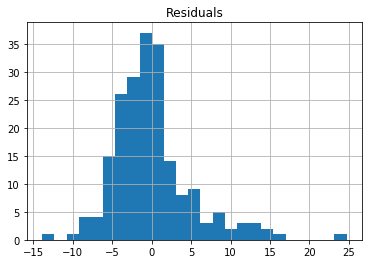

In [18]:
y_pred = best_model.predict(valid_X[best_variables])
all_residuals = valid_y - y_pred
pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.show()


### FORWARD SELECTION

In [19]:
best_model, best_variables = forward_selection(train_X.columns, train_model,score_model,verbose=True)
print('best variables:',best_variables)
print("VALIDATION RESULTS: ")
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1817.90, add DIS
Step: score=1811.82, add ZN
Step: score=1810.16, add CRIM
Step: score=1808.01, add RAD
Step: score=1803.57, add TAX
Step: score=1803.57, add None
best variables: ['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']
VALIDATION RESULTS: 

Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733


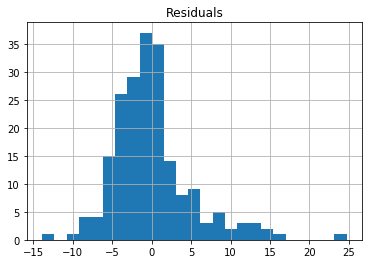

In [20]:
y_pred = best_model.predict(valid_X[best_variables])
all_residuals = valid_y - y_pred
pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.show()

In [21]:
# stepwise (both) method
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)
print("Best Subset:", best_variables)
print("VALIDATION RESULTS: ")
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1817.90, add DIS
Step: score=1811.82, add ZN
Step: score=1810.16, add CRIM
Step: score=1808.01, add RAD
Step: score=1803.57, add TAX
Step: score=1803.57, unchanged None
Best Subset: ['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']
VALIDATION RESULTS: 

Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733


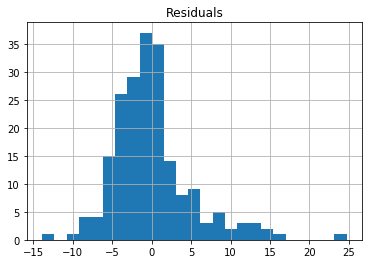

In [22]:
y_pred = best_model.predict(valid_X[best_variables])
all_residuals = valid_y - y_pred
pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.show()

Forward selection , stepwise selection and backward elimination yielded similar results, with approximately same validation accuray with RMSE 5.07, and less variation in residuals. 
So we can do final training on these set of variables.


### BEST MODEL 

In [23]:
best_variables=['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']


In [24]:
model= LinearRegression()
model.fit(train_X[best_variables],train_y)
print(" Trainingresults on subset of varaibles")
regressionSummary(train_y, model.predict(train_X[best_variables]))
print("\n")
print("VALIDATION RESULTS on subset of varaibles")
regressionSummary(valid_y, model.predict(valid_X[best_variables]))

 Trainingresults on subset of varaibles

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 4.5615
            Mean Absolute Error (MAE) : 3.1662
          Mean Percentage Error (MPE) : -3.4181
Mean Absolute Percentage Error (MAPE) : 16.4898


VALIDATION RESULTS on subset of varaibles

Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733
